<a href="https://colab.research.google.com/github/Renato-Eishima/Python_analise_financas/blob/main/Markowitz_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtendo a Fronteira Eficiente de Markowitz - parte 3

Ok, vamos continuar o exercício a partir da última aula.

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 14.9 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

acoes = ['EGIE3.SA', 'ITSA4.SA', 'SULA11.SA', 'ABEV3.SA', 'LREN3.SA', 'SLCE3.SA', 'BBAS3.SA', 'CSAN3.SA', 'B3SA3.SA'] 
carteira = pd.DataFrame()

for acao in acoes:
  carteira[acao] = yf.download(acao, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
ret_log = np.log(carteira / carteira.shift(1))
num_ativo = len(acoes)

pesos = np.random.random(num_ativo)
pesos /= np.sum(pesos)              # é o mesmo que pesos = pesos / sum(pesos)
pesos                               # a linha acima serve para criar nove pesos cuja soma é igual a 1 

array([0.25342722, 0.1112302 , 0.07966434, 0.11220403, 0.00654195,
       0.03068586, 0.13564023, 0.13282311, 0.13778306])

Agora, estimando o retorno esperado da carteira, a Variância e a Volatilidade.

Retorno Esperado da Carteira:

In [4]:
ret_carteira = np.sum(pesos * ret_log.mean()) * 250 # ret_carteira - expectativa do retorno da carteira
ret_carteira

0.1523280245197839

Variância Esperada da Carteira:

In [5]:
var_carteira = np.dot(pesos.T, np.dot(ret_log.cov() * 250, pesos))
var_carteira

0.06291939907368947

Volatilidade Esperada da Carteira:

In [6]:
vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(ret_log.cov() * 250, pesos)))
vol_carteira

0.25083739568431473

O resto desse exercício será uma reprodução do que foi feito em aula.

1)	Crie duas listas vazias. Nomeie-os como retorno_carteira e volatilidade_carteira.

In [7]:
retorno_carteira = []
volatilidade_carteira = []

2)  Crie um loop de 1000 iterações que gerará os pesos aleatórios e inserindo os valores obtidos do retorno da carteira e o volatidade da carteira nas listas retorno_carteira e volatilidade_carteira, respectivamente.

In [8]:
for x in range(1000):
  pesos = np.random.random(num_ativo)
  pesos /= np.sum(pesos)
  ret_carteira = np.sum(pesos * ret_log.mean()) * 250
  vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(ret_log.cov() * 250, pesos)))
  retorno_carteira.append(ret_carteira)
  volatilidade_carteira.append(vol_carteira)

retorno_carteira, volatilidade_carteira

([0.19232709125710587,
  0.15256828894182572,
  0.16263890964255803,
  0.16426208797946432,
  0.13747391179012775,
  0.15896370082868017,
  0.13416497392590443,
  0.211911146213377,
  0.16764556523195423,
  0.1532306640272377,
  0.18074800232393481,
  0.18872175573166974,
  0.17624197658711468,
  0.20825471592794986,
  0.13449031347596385,
  0.14493118696574647,
  0.19636609874713834,
  0.18289048696074642,
  0.1615435631986626,
  0.16837064379233221,
  0.1502777013426888,
  0.18193757017951395,
  0.202568663069295,
  0.17580426474267843,
  0.14653265413887112,
  0.17909376229459686,
  0.14636539505870544,
  0.12208285367837729,
  0.19127631643738038,
  0.14708727158417947,
  0.1739763070860936,
  0.13114619489841517,
  0.13162950194994844,
  0.16053527408342685,
  0.13239852585472414,
  0.1380631643520079,
  0.18763562071328782,
  0.18737151824372897,
  0.18997440494190343,
  0.16566251364339218,
  0.16718484254078791,
  0.13883047833233278,
  0.18352889416188897,
  0.1713867508880306

3)	Transforme as listas obtidas em NumPy array e insira dentro retorno_carteira e volatilidade_carteira. Uma vez tendo feito isso, os dois objetos serão do tipo NumPy array. 

In [9]:
retorno_carteira = np.array(retorno_carteira)
volatilidade_carteira = np.array(volatilidade_carteira)

retorno_carteira, volatilidade_carteira
# Veja que agora os dois não são mais listas, mas do tipo NumPy Array.

(array([0.19232709, 0.15256829, 0.16263891, 0.16426209, 0.13747391,
        0.1589637 , 0.13416497, 0.21191115, 0.16764557, 0.15323066,
        0.180748  , 0.18872176, 0.17624198, 0.20825472, 0.13449031,
        0.14493119, 0.1963661 , 0.18289049, 0.16154356, 0.16837064,
        0.1502777 , 0.18193757, 0.20256866, 0.17580426, 0.14653265,
        0.17909376, 0.1463654 , 0.12208285, 0.19127632, 0.14708727,
        0.17397631, 0.13114619, 0.1316295 , 0.16053527, 0.13239853,
        0.13806316, 0.18763562, 0.18737152, 0.1899744 , 0.16566251,
        0.16718484, 0.13883048, 0.18352889, 0.17138675, 0.17441564,
        0.1739093 , 0.13085268, 0.18976031, 0.17139191, 0.22427041,
        0.20430248, 0.15666298, 0.17543352, 0.15888401, 0.11328105,
        0.14137499, 0.18406733, 0.18796134, 0.18802506, 0.23730378,
        0.1595689 , 0.19287928, 0.19841787, 0.16276679, 0.16767358,
        0.1723525 , 0.14868122, 0.15995307, 0.20603048, 0.15680706,
        0.16894476, 0.16564029, 0.15864795, 0.13

Agora, crie um dicionário chamado portifolio, cuja chaves são os strings 'Retorno' e 'Volatilidade' e cujos valores são do NumPy arrays 'retorno_carteira' e 'volatilidade_carteira'

In [11]:
portifolio = pd.DataFrame({'Retorno': retorno_carteira, 'Volatilidade': volatilidade_carteira})

In [12]:
portifolio.head()

,Retorno,Volatilidade
0,0.192327,0.248339
1,0.152568,0.290416
2,0.162639,0.262103
3,0.164262,0.252886
4,0.137474,0.268935


In [13]:
portifolio.tail()

,Retorno,Volatilidade
995,0.179826,0.254056
996,0.135681,0.251458
997,0.162365,0.258289
998,0.153082,0.256068
999,0.155181,0.253085


Por fim, plote os dados do dicionário de portfólios em um gráfico. Deixe o eixo x representar os dados de volatilidade do dicionário de portfólios e o eixo y – os dados sobre taxas de retorno. <br />
Organize bem seu gráfico e certifique-se de ter rotulado os eixos x e y.

Text(0, 0.5, 'Retorno Esperado')

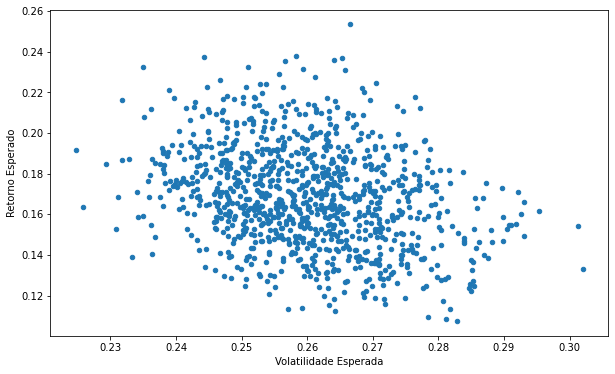

In [14]:
portifolio.plot(x = 'Volatilidade', y = 'Retorno', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Volatilidade Esperada')
plt.ylabel('Retorno Esperado')